## Crowd Source Recommendation System



#### Authors: 
- Jayant Raisinghani
- Alisha Fernandes
- Apoorva Jasti 
- Gaurav Choudhary 
- Amey Athaley 



## Scrape reviews from beeradvocate.com

In [0]:
#importing libraries
import numpy as np
import pandas as pd 
import nltk
from nltk.corpus import stopwords
import io
#import libraries needed for text preprocessing
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize


In [0]:
!pip install selenium
from selenium import webdriver
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [0]:
# Enter your chrome driver details**
driver = webdriver.Chrome(' ')

In [0]:
driver.get('https://www.beeradvocate.com/beer/top-rated/')

In [0]:
brd = {}
for i in range(2,252):
    br = driver.find_element_by_xpath('//div[@id="ba-content"]/table/tbody/tr['+str(i)+']/td[2]/a')
    br_name = driver.find_element_by_xpath('//div[@id="ba-content"]/table/tbody/tr['+str(i)+']/td[2]/a/b').text
    brd[br_name] = br.get_attribute('href')


In [0]:
comments_file = pd.DataFrame( columns = ['Beer','Rating','Review'])

for key,value in brd.items():
        driver.get(value)
        reviews = driver.find_elements_by_xpath('//div[@id="rating_fullview_content_2"]')
        #ratings = driver.find_elements_by_xpath(//*[@id="rating_fullview_content_2"]/span[1])
        for review in reviews[:25]:
            try:

                review_cmmnts = review.text
                #print(review_text)
                rating = review.find_element_by_xpath('.//span[1]').text
                rep1 = review.find_element_by_xpath('.//span[2]').text
                rep2 = review.find_element_by_xpath('.//span[3]').text
                rep3 = review.find_element_by_xpath('.//span[4]').text
                rep4 = review.find_element_by_xpath('.//span[5]').text
                rep5 = review.find_element_by_xpath('.//div').text
                if rating:
                    review_cmmnts = review_cmmnts.replace(rating,"")
                if rep1:
                    review_cmmnts = review_cmmnts.replace(rep1,"")
                if rep2:
                    review_cmmnts = review_cmmnts.replace(rep2,"")
                if rep3:
                    review_cmmnts = review_cmmnts.replace(rep3,"")
                if extra4:
                    review_cmmnts = review_cmmnts.replace(rep4,"")
                if rep5:
                    review_cmmnts = review_cmmnts.replace(rep5,"")
                review_cmmnts = review_cmmnts.replace('rDev',"")

                print(review_cmmnts)            

                #p = reviews[1].text
                #q = rating[1].text
                k = pd.DataFrame({"Beer": key,
                                  "Rating": rating,
                                  "Review": [review_cmmnts]
                                 })

                comments_file = comments_file.append(k)
            except:
                pass


        

In [0]:
# Some extra manupulations on the text
def rev(w):
    w = w.replace("\n","")
    w = w.replace("look:  | smell:  | taste:  | feel:  | overall:","")
    w = w.replace("/","")
    return(w)

comments_file["Revmod"] = comments_file["Review"].map(rev)


In [0]:
# Filtering out the required columns
comments_file2 = comments_file.copy()
comments_file2["Review"] = comments_file2["Revmod"]
comments_file2 = comments_file2.loc[:,["Beer","Rating","Review"]]


In [2]:
# Following is the comments file 
comments_file2[:5]

,Unnamed: 0,Beer,Rating,Review
0,0,Kentucky Brunch Brand Stout,4.80,"2016 Silver Wax. Aroma has whiskey, maple, ..."
1,0,Kentucky Brunch Brand Stout,4.74,The beer pours Pitch Black with a frothy ta...
2,0,Kentucky Brunch Brand Stout,4.68,Probably the smoothest beer I have ever had...
3,0,Kentucky Brunch Brand Stout,5.00,"Dark black, very thick, a little bit of ta..."
4,0,Kentucky Brunch Brand Stout,4.97,Poured black as ink with thin ruby edges at...


<HR>

### Task B. 

<HR>


Assuming that a customer, who will be using this recommendation system, has specified 3 attributes in a beer. 

Following are some attributes of a beer:

<LI>Aggressive (Boldly assertive aroma and/or taste) 
<LI>Balanced: Malt and hops in similar proportions; equal representation of malt sweetness and hop bitterness in the flavor — especially at the finish
<LI>Complex: Multidimensional; many flavors and sensations on the palate
<LI>Crisp: Highly carbonated; effervescent
<LI>Fruity: Flavors reminiscent of various fruits or Hoppy: Herbal, earthy, spicy, or citric aromas and flavors of hops or Malty: Grainy, caramel-like; can be sweet or dry
<LI>Robust: Rich and full-bodied

Performing word count associated with these attributes and choosing top 3 of them 

In [26]:
comments_df= comments_file2
comments_df.head()

,Unnamed: 0,Beer,Rating,Review
0,0,Kentucky Brunch Brand Stout,4.80,"2016 Silver Wax. Aroma has whiskey, maple, ..."
1,0,Kentucky Brunch Brand Stout,4.74,The beer pours Pitch Black with a frothy ta...
2,0,Kentucky Brunch Brand Stout,4.68,Probably the smoothest beer I have ever had...
3,0,Kentucky Brunch Brand Stout,5.00,"Dark black, very thick, a little bit of ta..."
4,0,Kentucky Brunch Brand Stout,4.97,Poured black as ink with thin ruby edges at...


In [0]:
#Stripping off leading or trailing spaces
comments_df['Review']=comments_df['Review'].map(lambda x : x.strip().lower())

In [28]:
#Removing punctuations
import string
stop = stopwords.words('english')
comments_df['Reviews_Clean'] = comments_df['Review'].apply(lambda s : s.translate(str.maketrans('', '', string.punctuation)))
comments_df['Reviews_Clean'].head(10)

0    2016 silver wax aroma has whiskey maple toffee...
1    the beer pours pitch black with a frothy tan h...
2    probably the smoothest beer i have ever had sm...
3    dark black very thick a little bit of tan head...
4    poured black as ink with thin ruby edges at 58...
5    she’s got heatbut man is she somethin nice lot...
6    amazing brew the maple aroma pours out of this...
7    finally got to try the white whale pours like ...
8    had this on tap at the 121518 release in decor...
9    had this on tap at the kbbs release 121518 pou...
Name: Reviews_Clean, dtype: object

In [29]:
#Tokenize 
comments_df['Reviews_Clean']=comments_df['Reviews_Clean'].apply(lambda x : nltk.word_tokenize(x))
comments_df['Reviews_Clean'].head(10)

0    [2016, silver, wax, aroma, has, whiskey, maple...
1    [the, beer, pours, pitch, black, with, a, frot...
2    [probably, the, smoothest, beer, i, have, ever...
3    [dark, black, very, thick, a, little, bit, of,...
4    [poured, black, as, ink, with, thin, ruby, edg...
5    [she, ’, s, got, heatbut, man, is, she, someth...
6    [amazing, brew, the, maple, aroma, pours, out,...
7    [finally, got, to, try, the, white, whale, pou...
8    [had, this, on, tap, at, the, 121518, release,...
9    [had, this, on, tap, at, the, kbbs, release, 1...
Name: Reviews_Clean, dtype: object

In [30]:
bag_of_words=[]
for i,r in comments_df.iterrows():
    #print(r['Reviews_Clean'])
    bag_of_words.append(r['Reviews_Clean'])

bag_of_words = [y for x in bag_of_words for y in x]
print(bag_of_words[:1000])

['2016', 'silver', 'wax', 'aroma', 'has', 'whiskey', 'maple', 'toffee', 'and', 'umami', 'taste', 'has', 'wood', 'barrel', 'umami', 'dark', 'fruit', 'maple', 'and', 'toffee', 'bitter', 'cacao', 'and', 'coffee', 'aftertaste', 'the', 'beer', 'pours', 'pitch', 'black', 'with', 'a', 'frothy', 'tan', 'head', 'the', 'bottle', 'gushed', 'when', 'i', 'opened', 'it', 'it', 'smells', 'and', 'tastes', 'of', 'maple', 'syrup', 'coffee', 'creams', 'brûlée', 'vanilla', 'and', 'warm', 'bourbon', 'the', 'feel', 'is', 'slick', 'and', 'smooth', 'probably', 'the', 'smoothest', 'beer', 'i', 'have', 'ever', 'had', 'smelled', 'better', 'than', 'it', 'tasted', 'lots', 'of', 'notes', 'on', 'the', 'nose', 'from', 'vanilla', 'to', 'caramelmaple', 'to', 'figs', 'but', 'the', 'taste', 'didnt', 'follow', 'suit', 'and', 'it', 'mostly', 'being', 'maple', 'supported', 'by', 'the', 'others', 'notes', 'on', 'the', 'nose', 'and', 'barrel', 'no', 'discernible', 'alcohol', 'present', 'but', 'the', 'bourbon', 'flavor', 'was'

In [31]:
#Removing stop words
stop = stopwords.words('english')
bag_of_words  = [x for x in bag_of_words if x not in stop]
bag_of_words[:1000]

['2016',
 'silver',
 'wax',
 'aroma',
 'whiskey',
 'maple',
 'toffee',
 'umami',
 'taste',
 'wood',
 'barrel',
 'umami',
 'dark',
 'fruit',
 'maple',
 'toffee',
 'bitter',
 'cacao',
 'coffee',
 'aftertaste',
 'beer',
 'pours',
 'pitch',
 'black',
 'frothy',
 'tan',
 'head',
 'bottle',
 'gushed',
 'opened',
 'smells',
 'tastes',
 'maple',
 'syrup',
 'coffee',
 'creams',
 'brûlée',
 'vanilla',
 'warm',
 'bourbon',
 'feel',
 'slick',
 'smooth',
 'probably',
 'smoothest',
 'beer',
 'ever',
 'smelled',
 'better',
 'tasted',
 'lots',
 'notes',
 'nose',
 'vanilla',
 'caramelmaple',
 'figs',
 'taste',
 'didnt',
 'follow',
 'suit',
 'mostly',
 'maple',
 'supported',
 'others',
 'notes',
 'nose',
 'barrel',
 'discernible',
 'alcohol',
 'present',
 'bourbon',
 'flavor',
 'start',
 'finish',
 'carbonation',
 'lacking',
 'would',
 'helped',
 'beer',
 'overall',
 'excellent',
 'beer',
 'par',
 'mexican',
 'cake',
 'reserva',
 'dark',
 'black',
 'thick',
 'little',
 'bit',
 'tan',
 'head',
 'smells',

In [32]:
#Lemmatization
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
bag_of_words=[lemmatizer.lemmatize(x) for x in bag_of_words]
bag_of_words[:1000]

['2016',
 'silver',
 'wax',
 'aroma',
 'whiskey',
 'maple',
 'toffee',
 'umami',
 'taste',
 'wood',
 'barrel',
 'umami',
 'dark',
 'fruit',
 'maple',
 'toffee',
 'bitter',
 'cacao',
 'coffee',
 'aftertaste',
 'beer',
 'pours',
 'pitch',
 'black',
 'frothy',
 'tan',
 'head',
 'bottle',
 'gushed',
 'opened',
 'smell',
 'taste',
 'maple',
 'syrup',
 'coffee',
 'cream',
 'brûlée',
 'vanilla',
 'warm',
 'bourbon',
 'feel',
 'slick',
 'smooth',
 'probably',
 'smoothest',
 'beer',
 'ever',
 'smelled',
 'better',
 'tasted',
 'lot',
 'note',
 'nose',
 'vanilla',
 'caramelmaple',
 'fig',
 'taste',
 'didnt',
 'follow',
 'suit',
 'mostly',
 'maple',
 'supported',
 'others',
 'note',
 'nose',
 'barrel',
 'discernible',
 'alcohol',
 'present',
 'bourbon',
 'flavor',
 'start',
 'finish',
 'carbonation',
 'lacking',
 'would',
 'helped',
 'beer',
 'overall',
 'excellent',
 'beer',
 'par',
 'mexican',
 'cake',
 'reserva',
 'dark',
 'black',
 'thick',
 'little',
 'bit',
 'tan',
 'head',
 'smell',
 'amazi

In [33]:
#Frequency counts
from collections import Counter
freq_count_dict = Counter(bag_of_words)
word_fq_df=pd.DataFrame(list(freq_count_dict.items()),columns=['Word','Freq'])
word_fq_df.sort_values(by="Freq",ascending=False,inplace=True)
word_fq_df[:10]

,Word,Freq
17,beer,5464
23,head,3402
57,flavor,2800
8,taste,2691
11,dark,2639
76,chocolate,2585
180,like,2315
77,sweet,2205
44,note,2157
222,one,2087


In [0]:
def mapAttr(word):
    if word in ["aggressive","bold","strong","assertive"] :
        return "Assertive"
    elif word in ["balanced"]:
        return "Balanced"
    elif word in ["complex","multidimensional"]:
        return "Complex"
    elif word in ["crisp","carobonated"]:
        return "Crisp"
    elif word in ["fruity","hoppy","malty","caramel"]:
        return "Fruity"
    elif word in ["rich","fullbodied","full-bodied"]:
        return "Rich"

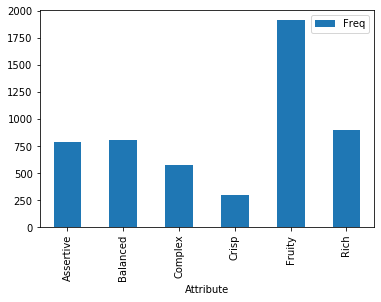

In [35]:
beer_attributes =["aggressive","bold","strong","assertive","balanced","complex","multidimensional","crisp","carobonated","fruity","hoppy","malty","caramel","robust","rich","fullbodied","full-bodied"]
word_fq_df=word_fq_df[word_fq_df['Word'].isin(beer_attributes)]


word_fq_df['Attribute']=word_fq_df['Word'].apply(mapAttr)
word_fq_df.groupby('Attribute').agg({'Freq':sum}).plot.bar()

# We can use Fruity, Rich and Balanced

Performing a similarity analysis with the 3-attribute set and the reviews. and from the output, choosing 300 reviews that have the highest similarity scores with the attribute set we have chosen. 

In [5]:

stop = stopwords.words('english')
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [0]:
#define functions to remove stop words, tokenize and lemmatize text
def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2   
  
def clean_txt(text):
  clean_text = []
  clean_text2 = []
  text = re.sub("'", "",text)
  text=re.sub("(\\d|\\W)+"," ",text) 
  text = text.replace("nbsp", "")
  clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
  clean_text2 = [word for word in clean_text if black_txt(word)]
  return " ".join(clean_text2)

In [0]:
df['Review'] = df['Review'].apply(clean_txt)

In [8]:
#Using Spacy Similarity to identify matches 
import spacy

#Download spacy full vector package
!python -m spacy download en_core_web_lg

!ls  /usr/local/lib/python3.6/dist-packages/en_core_web_lg
nlp = spacy.load('/usr/local/lib/python3.6/dist-packages/en_core_web_lg/en_core_web_lg-2.1.0')

     |████████████████████████████████| 826.9MB 2.7MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.1.0-cp36-none-any.whl size=828255076 sha256=26260cd26815077df0d61bea82725744582d4ffb45a61a251f8c9f093bb27d0f
  Stored in directory: /tmp/pip-ephem-wheel-cache-r5frc3il/wheels/b4/d7/70/426d313a459f82ed5e06cc36a50e2bb2f0ec5cb31d8e0bdf09
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')
en_core_web_lg-2.1.0  __init__.py  meta.json  __pycache__


In [9]:
#Transforming reviews file into spacy document
list_docs = []
for i in range(len(df)):
  doc = nlp("u'" + df['Review'][i] + "'")
  beer = df['Beer'][i]
  rating = df['Rating'][i]
  list_docs.append((doc,i, beer, rating))
print(len(list_docs))

#Define a function to calculate Spacy similarity
def calculateSimWithSpaCy(nlp, df, user_text, n=6):
    # Calculate similarity using spaCy
    list_sim =[]
    doc1 = nlp("u'" + user_text + "'")
    for i in df.index:
      try:
            doc2 = list_docs[i][0]
            beer_name = list_docs[i][2]
            score = doc1.similarity(doc2)
            star_rating = list_docs[i][3]
            list_sim.append((doc1, doc2, list_docs[i][1],beer_name, score, star_rating))
      except:
        continue

    return  list_sim

#Apply the above defined function to review and attribute documents
df3 = calculateSimWithSpaCy(nlp, df, 'rich fruity balanced', n=15)

6201


In [0]:
#Creating dataframe for all 6000 reviews with spacy similarity score
df_reco_6000 = pd.DataFrame(df3).sort_values([4], ascending=False)

df_reco_6000.reset_index(inplace=True)

index_spacy = df_reco_6000[2]
list_scores = df_reco_6000[3]

df_reco_6000.columns = ["index", "attributes", "product_review", "Extra", "product_name", "similarity_score", "Star Rating"]

In [11]:
#Output file containing product_name, product_review, and similarity_score for 6000 reviews
df_reco_6000.drop(axis = 1, columns = ['Extra', 'index', 'attributes', 'Star Rating'], inplace=True)
df_reco_6000

,product_review,product_name,similarity_score
0,"(u'wow, amaze, incredible, aromas, peach, dank...",Galaxy Dry Hopped Fort Point Pale Ale,0.800990
1,"(u'incredible, raspberry, cherry, aromas, oaky...",Atrial Rubicite,0.785451
2,"(u'well, balance, drinkable, much, novelty, lo...",Double Dry Hopped Fort Point Pale Ale,0.782960
3,"(u'look, classic, nehazy, golden, colorsmell, ...",Heavy Mettle,0.782228
4,"(u'tap, beavertown, extravaganza, aroma, sweet...",Duck Duck Gooze,0.779697
...,...,...,...
6196,"(u'bottle, bottle, date, oct, abv, black, colo...",Bourbon County Brand Stout,0.343688
6197,"(u'blind, test, bourbon, county, rank, third, ...",Bourbon County Brand Stout,0.318074
6198,"(u'pour, glass, stamp, date, mostly, clear, li...",Abrasive Ale,0.310545
6199,"(u'look, smell, taste, feel, overall, lata, la...",Sosus,0.186945


In [0]:
#Selecting top 300 reviews by similarity scores and removing unnecessary columns
df_reco_300a =  df_reco_6000.nlargest(300, 'similarity_score')

In [13]:
#Averaging scores for reviews of same beers
df_reco_300_beer = df_reco_300a.groupby(['product_name']).mean()
df_reco_300_beer = df_reco_300_beer.sort_values(by = ['similarity_score'], ascending=False)
df_reco_300_beer.reset_index(inplace = True)
df_reco_300_beer

,product_name,similarity_score
0,Mastermind,0.771280
1,Heavy Mettle,0.761094
2,Atrial Rubicite,0.760354
3,Double Dry Hopped Fort Point Pale Ale,0.758448
4,Galaxy Dry Hopped Fort Point Pale Ale,0.756935
...,...,...
121,The Broken Truck,0.727100
122,Adam From The Wood,0.726949
123,Hopslam Ale,0.726632
124,4th Anniversary,0.726102


Performing sentiment analysis on these 300 reviews and sort them (high to low) by the sentiment scores.

In [14]:
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
  
# function to print sentiments of the review 
def sentiment_scores(sentence): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    # polarity_scores method of SentimentIntensityAnalyzer gives a sentiment dictionary containing pos, neg, neu, and compound scores. 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
         
    return ([sentiment_dict['compound']])

     |████████████████████████████████| 133kB 2.7MB/s 


In [0]:
#Converting list of words into a single sentence and running sentiment
df_reco_300a['product_review']=df_reco_300a['product_review'].apply(str)
df_reco_300a['Sentiment_calc']=df_reco_300a['product_review'].apply(sentiment_scores)

In [0]:
# df['Sentiment_1']=df['Sentiment'][3]
for column_name in df.columns:
    df_reco_300a['sentiment_score'] = [i[0] for i in df_reco_300a['Sentiment_calc']]
    
df_reco_300a.drop(columns=['Sentiment_calc'], inplace = True)

In [0]:
df_reco_300 = df_reco_300a.drop(columns = ['product_review'])

#Averaging scores for reviews of same beers
df_reco_300_beer = df_reco_300.groupby(['product_name']).mean()
df_reco_300_beer = df_reco_300_beer.sort_values(by = ['similarity_score'], ascending=False)
df_reco_300_beer.reset_index(inplace = True)

Based on the above two tasks, recommending 3 beers to the customer

The three products we are recommending have been calculated by looking at the top 20 beers by average sentiment and similarity scores, and selecting the beers with atleast 0.93 sentiment score and 0.70 similarity score (3 point difference from the max in each)

In [18]:
df_reco_300_beer[(df_reco_300_beer['similarity_score'] > 0.70) & (df_reco_300_beer['sentiment_score'] > 0.93)][:3]

,product_name,similarity_score,sentiment_score
12,Pseudo Sue,0.750553,0.9392
30,Double Nelson,0.744124,0.9584
40,Great,0.740339,0.9360
